## Final Project 
### Blindness Detection
#### Group: Gareth Sun zs389, Zimu Li zl898, Arman Syed as3778


### 1. Data Preprocess

In [1]:
# Import the Library we need
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.1
True


In [3]:
cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")
print(device)

cuda


In [4]:
print(tf.config.list_physical_devices('GPU'))

[]


In [5]:
# Load training Data
train_df = pd.read_csv('train.csv')
train_df['diagnosis'] = train_df['diagnosis'].astype(str)
train_df['pic_id'] = train_df['id_code'].astype(str)+'.png'
train_df.head()

,id_code,diagnosis,pic_id
0,000c1434d8d7,2,000c1434d8d7.png
1,001639a390f0,4,001639a390f0.png
2,0024cdab0c1e,1,0024cdab0c1e.png
3,002c21358ce6,0,002c21358ce6.png
4,005b95c28852,0,005b95c28852.png


In [6]:
# Data Load
preprocessor = ImageDataGenerator(
    # Normalization
    rescale=1/255,
    # Use Data Augmentation to prevent overfitting
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # Split validation and training dataset
    validation_split=0.2
)

# Set the batch and image size
image_size = 64
batch_size = 32

train_pic = preprocessor.flow_from_dataframe(
    dataframe=train_df,
    directory='train_images',
    x_col='pic_id',
    y_col='diagnosis',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training',
    target_size=(image_size, image_size)
)

test_pic = preprocessor.flow_from_dataframe(
    dataframe=train_df,
    directory='train_images',
    x_col='pic_id',
    y_col='diagnosis',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation',
    target_size=(image_size, image_size)
)

# Covert category into one-hot code
train_label = pd.get_dummies(train_df['diagnosis'])
num_classes = train_label.shape[1]
num_samples = train_label.shape[0]

print(num_classes)
print(num_samples)


Found 2930 validated image filenames belonging to 5 classes.
Found 732 validated image filenames belonging to 5 classes.
5
3662


### 2. Build CNN Model

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
def cnn_model(image_size, num_classes):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [9]:
model = cnn_model(image_size, num_classes)
# Save the model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

tm = ModelCheckpoint('version1', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

class AccuracyPlotter(Callback):
    def on_train_begin(self, logs={}):
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}):
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

    def on_train_end(self, logs={}):
        plt.figure(figsize=(20,10))
        plt.plot(range(1, len(self.train_acc) + 1), self.train_acc, label='Training Accuracy')
        plt.plot(range(1, len(self.val_acc) + 1), self.val_acc, label='Validation Accuracy')
        plt.title('Accuracy Plot')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.xticks(range(1, len(self.train_acc) + 1))
        plt.legend()
        plt.grid(True)
        plt.show()
        
plotter = AccuracyPlotter()

Epoch 1/50


91/91 [==============================] - ETA: 0s - loss: 1.1368 - accuracy: 0.5687
Epoch 1: val_loss improved from inf to 1.01984, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 206s 2s/step - loss: 1.1368 - accuracy: 0.5687 - val_loss: 1.0198 - val_accuracy: 0.6577
Epoch 2/50
91/91 [==============================] - ETA: 0s - loss: 0.9261 - accuracy: 0.6715
Epoch 2: val_loss improved from 1.01984 to 0.90805, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 175s 2s/step - loss: 0.9261 - accuracy: 0.6715 - val_loss: 0.9081 - val_accuracy: 0.6790
Epoch 3/50
91/91 [==============================] - ETA: 0s - loss: 0.8489 - accuracy: 0.7022
Epoch 3: val_loss improved from 0.90805 to 0.86644, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 173s 2s/step - loss: 0.8489 - accuracy: 0.7022 - val_loss: 0.8664 - val_accuracy: 0.6861
Epoch 4/50
91/91 [==============================] - ETA: 0s - loss: 0.8102 - accuracy: 0.7126
Epoch 4: val_loss improved from 0.86644 to 0.85450, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 172s 2s/step - loss: 0.8102 - accuracy: 0.7126 - val_loss: 0.8545 - val_accuracy: 0.6832
Epoch 5/50
91/91 [==============================] - ETA: 0s - loss: 0.8121 - accuracy: 0.7112
Epoch 5: val_loss improved from 0.85450 to 0.83887, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 171s 2s/step - loss: 0.8121 - accuracy: 0.7112 - val_loss: 0.8389 - val_accuracy: 0.6903
Epoch 6/50
91/91 [==============================] - ETA: 0s - loss: 0.7728 - accuracy: 0.7181
Epoch 6: val_loss did not improve from 0.83887
91/91 [==============================] - 171s 2s/step - loss: 0.7728 - accuracy: 0.7181 - val_loss: 0.8542 - val_accuracy: 0.6974
Epoch 7/50
91/91 [==============================] - ETA: 0s - loss: 0.7803 - accuracy: 0.7181
Epoch 7: val_loss improved from 0.83887 to 0.81618, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 172s 2s/step - loss: 0.7803 - accuracy: 0.7181 - val_loss: 0.8162 - val_accuracy: 0.7060
Epoch 8/50
91/91 [==============================] - ETA: 0s - loss: 0.7671 - accuracy: 0.7208
Epoch 8: val_loss improved from 0.81618 to 0.81241, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 172s 2s/step - loss: 0.7671 - accuracy: 0.7208 - val_loss: 0.8124 - val_accuracy: 0.7159
Epoch 9/50
91/91 [==============================] - ETA: 0s - loss: 0.7554 - accuracy: 0.7281
Epoch 9: val_loss did not improve from 0.81241
91/91 [==============================] - 171s 2s/step - loss: 0.7554 - accuracy: 0.7281 - val_loss: 0.8629 - val_accuracy: 0.7074
Epoch 10/50
91/91 [==============================] - ETA: 0s - loss: 0.7636 - accuracy: 0.7253
Epoch 10: val_loss did not improve from 0.81241
91/91 [==============================] - 171s 2s/step - loss: 0.7636 - accuracy: 0.7253 - val_loss: 0.8238 - val_accuracy: 0.7031
Epoch 11/50
91/91 [==============================] - ETA: 0s - loss: 0.7562 - accuracy: 0.7291
Epoch 11: val_loss improved from 0.81241 to 0.79132, saving model to version1
INFO:tensorflow:Assets written to: version1\assets


INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 172s 2s/step - loss: 0.7562 - accuracy: 0.7291 - val_loss: 0.7913 - val_accuracy: 0.7116
Epoch 12/50
91/91 [==============================] - ETA: 0s - loss: 0.7529 - accuracy: 0.7236
Epoch 12: val_loss did not improve from 0.79132
91/91 [==============================] - 171s 2s/step - loss: 0.7529 - accuracy: 0.7236 - val_loss: 0.8051 - val_accuracy: 0.7159
Epoch 13/50
91/91 [==============================] - ETA: 0s - loss: 0.7380 - accuracy: 0.7371
Epoch 13: val_loss did not improve from 0.79132
91/91 [==============================] - 171s 2s/step - loss: 0.7380 - accuracy: 0.7371 - val_loss: 0.7942 - val_accuracy: 0.7159
Epoch 14/50
91/91 [==============================] - ETA: 0s - loss: 0.7365 - accuracy: 0.7284
Epoch 14: val_loss did not improve from 0.79132
91/91 [==============================] - 171s 2s/step - loss: 0.7365 - accuracy: 0.7284 - val_loss: 0.8454 - val_accuracy: 0.6974
Epoch 15/50
91/91 [==============================] 

INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 172s 2s/step - loss: 0.7244 - accuracy: 0.7302 - val_loss: 0.7709 - val_accuracy: 0.7301
Epoch 17/50
91/91 [==============================] - ETA: 0s - loss: 0.7082 - accuracy: 0.7291
Epoch 17: val_loss did not improve from 0.77085
91/91 [==============================] - 170s 2s/step - loss: 0.7082 - accuracy: 0.7291 - val_loss: 0.8177 - val_accuracy: 0.6989
Epoch 18/50
91/91 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.7357
Epoch 18: val_loss did not improve from 0.77085
91/91 [==============================] - 171s 2s/step - loss: 0.6966 - accuracy: 0.7357 - val_loss: 0.8401 - val_accuracy: 0.6946
Epoch 19/50
91/91 [==============================] - ETA: 0s - loss: 0.6971 - accuracy: 0.7291
Epoch 19: val_loss did not improve from 0.77085
91/91 [==============================] - 171s 2s/step - loss: 0.6971 - accuracy: 0.7291 - val_loss: 0.7927 - val_accuracy: 0.7173
Epoch 20/50
91/91 [==============================] 

INFO:tensorflow:Assets written to: version1\assets


91/91 [==============================] - 195s 2s/step - loss: 0.6258 - accuracy: 0.7609 - val_loss: 0.7703 - val_accuracy: 0.7060
Epoch 27/50
91/91 [==============================] - ETA: 0s - loss: 0.6213 - accuracy: 0.7602
Epoch 27: val_loss did not improve from 0.77029
91/91 [==============================] - 186s 2s/step - loss: 0.6213 - accuracy: 0.7602 - val_loss: 0.7743 - val_accuracy: 0.7060
Epoch 28/50
91/91 [==============================] - ETA: 0s - loss: 0.6073 - accuracy: 0.7657
Epoch 28: val_loss did not improve from 0.77029
91/91 [==============================] - 182s 2s/step - loss: 0.6073 - accuracy: 0.7657 - val_loss: 0.7769 - val_accuracy: 0.7131
Epoch 29/50
91/91 [==============================] - ETA: 0s - loss: 0.5918 - accuracy: 0.7660
Epoch 29: val_loss did not improve from 0.77029
91/91 [==============================] - 184s 2s/step - loss: 0.5918 - accuracy: 0.7660 - val_loss: 0.8082 - val_accuracy: 0.7074
Epoch 30/50
91/91 [==============================] 

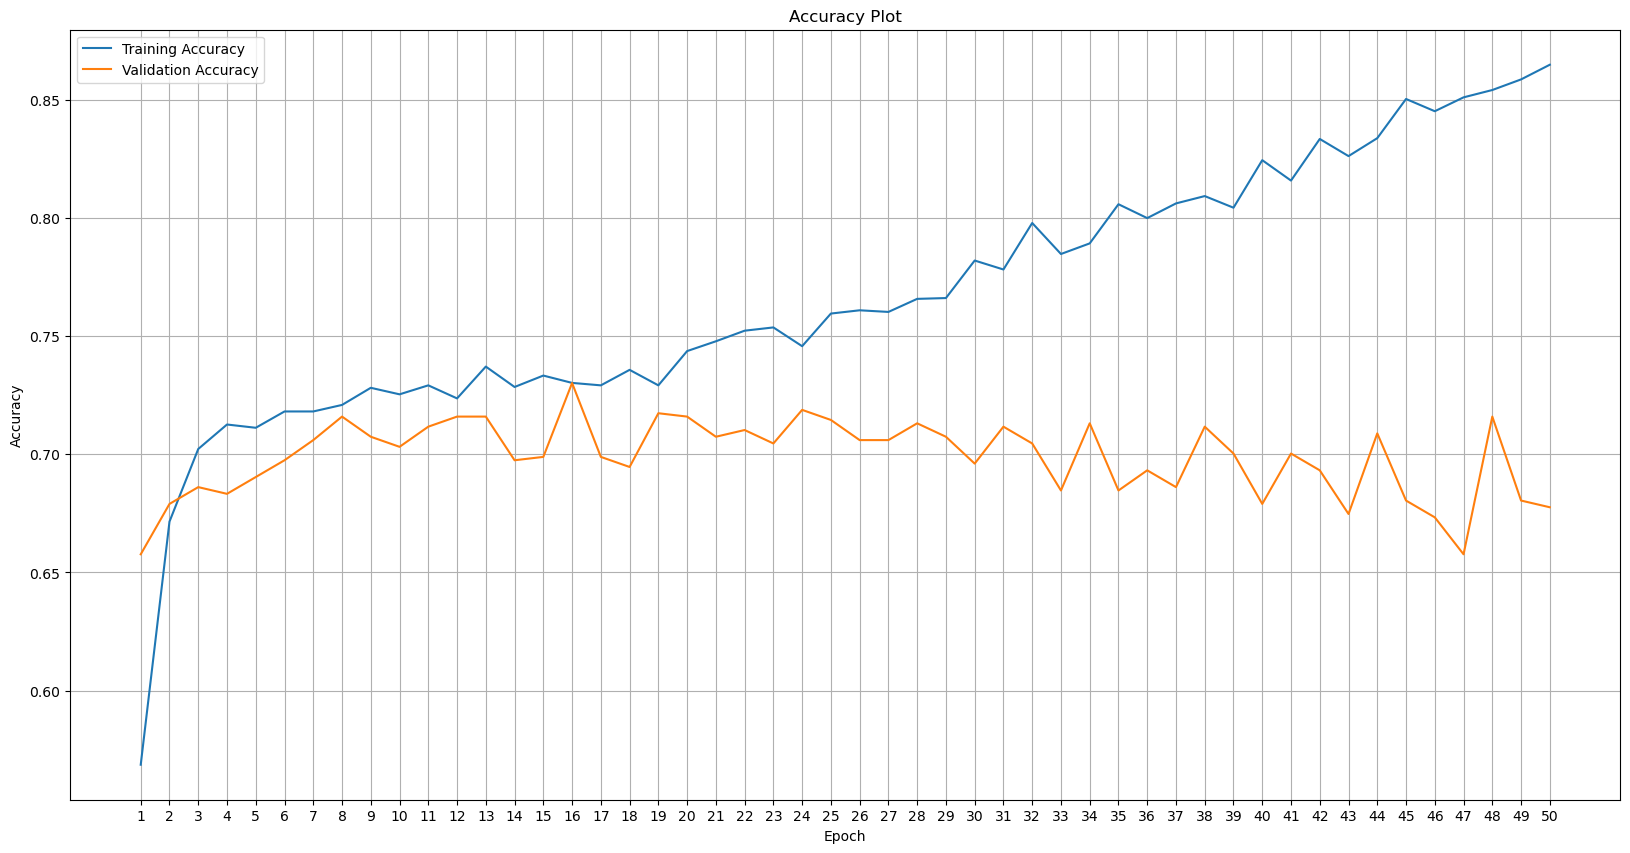

In [10]:
steps_per_epoch = 2930 // batch_size
validation_steps = 732 // batch_size
model.fit(
    train_pic,
    steps_per_epoch=steps_per_epoch, 
    epochs=50, 
    validation_data=test_pic,
    validation_steps=validation_steps,
    callbacks=[tm, plotter]
)

### 3. Give out Prediction Results

In [11]:
from keras.models import load_model
from math import ceil

trained_model = load_model('version1')

prediction_df = pd.read_csv('sample_submission.csv')
prediction_df['pic_id'] = prediction_df['id_code'].astype(str) + '.png'

In [12]:
prediction_pic = ImageDataGenerator(rescale=1/255)
pre_prediction = prediction_pic.flow_from_dataframe(
    dataframe=prediction_df,
    directory='test_images',
    x_col='pic_id',
    y_col=None,
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    target_size=(image_size, image_size)
)

Found 1928 validated image filenames.


In [13]:
test_steps = ceil(pre_prediction.n / batch_size)

results = trained_model.predict(pre_prediction, steps=test_steps)

max_probability = np.argmax(results, axis=1)
prediction_df['diagnosis'] = max_probability

prediction_df.drop(columns=['pic_id'], inplace=True)
prediction_df.to_csv('submission.csv', index=False)

61/61 [==============================] - 47s 772ms/step
